In [1]:
!pip install deflate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 KB 3.3 MB/s eta 0:00:00


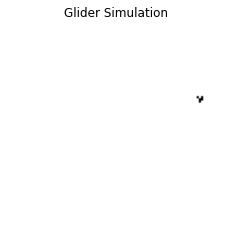

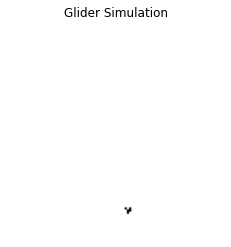

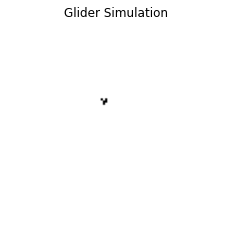

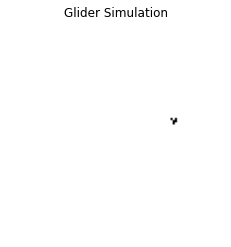

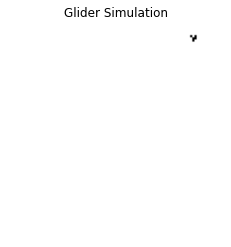

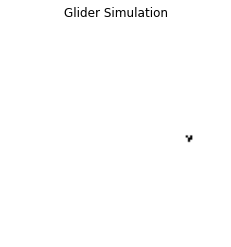

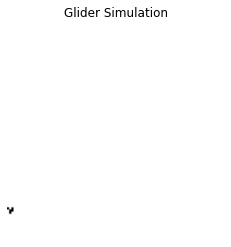

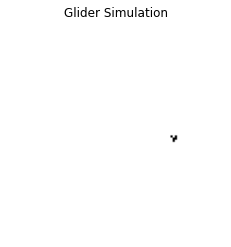

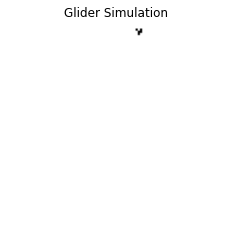

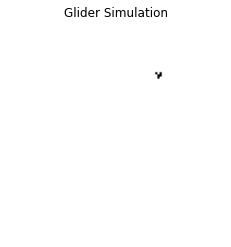

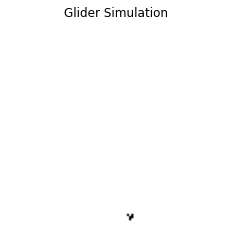

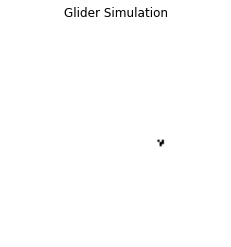

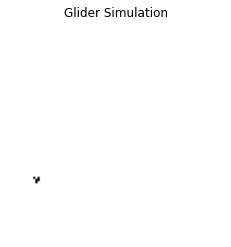

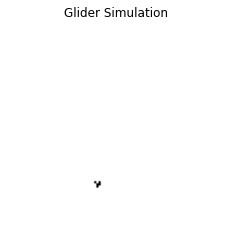

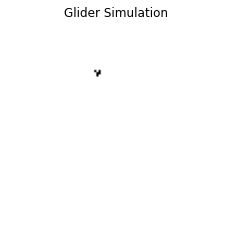

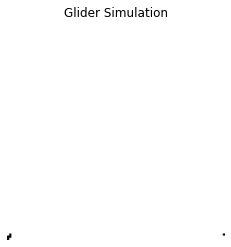

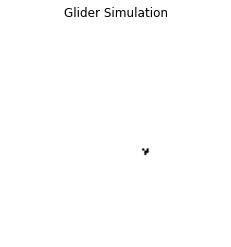

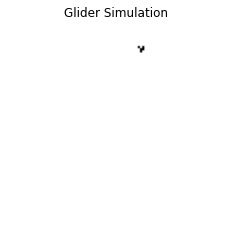

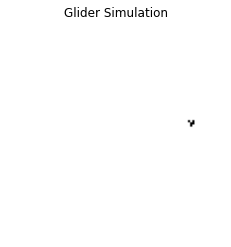

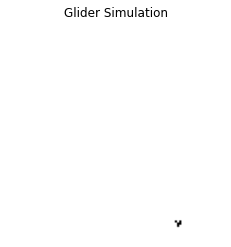

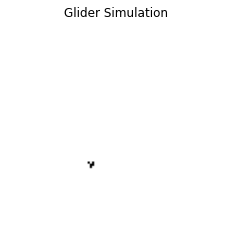

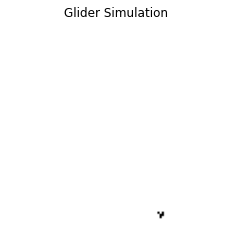

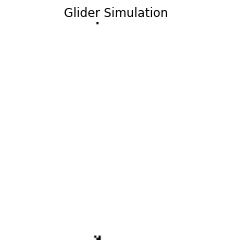

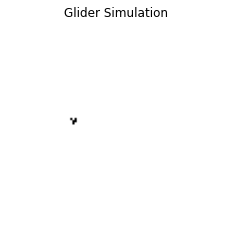

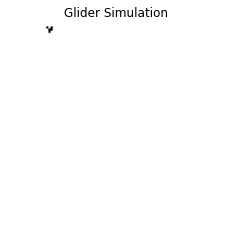

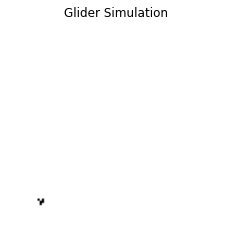

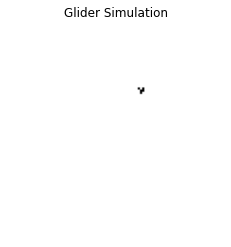

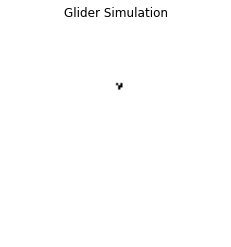

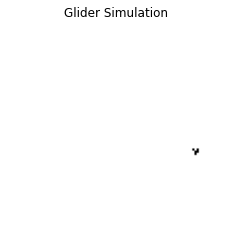

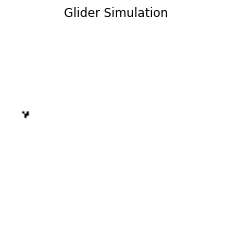

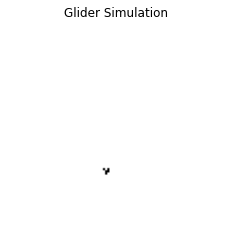

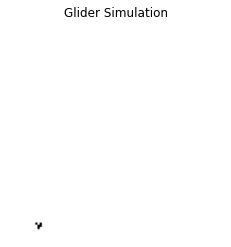

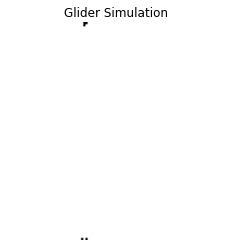

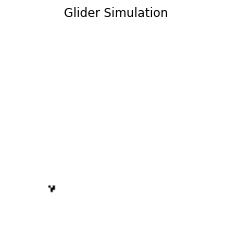

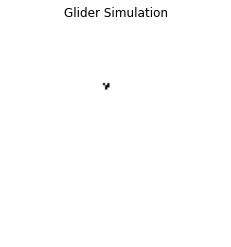

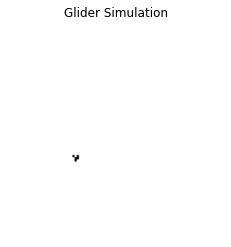

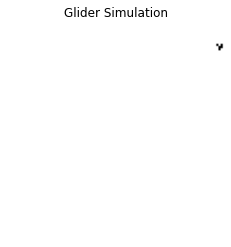

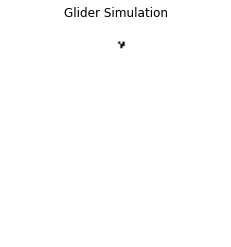

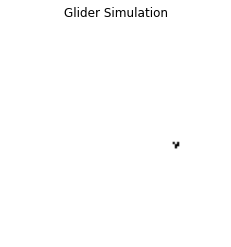

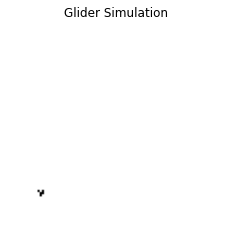

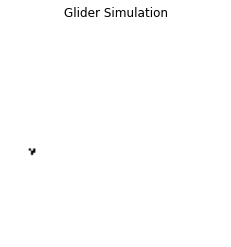

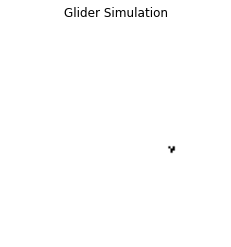

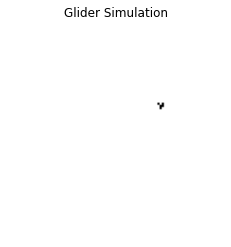

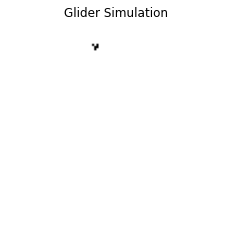

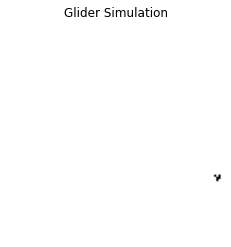

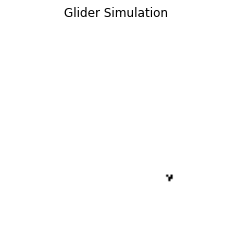

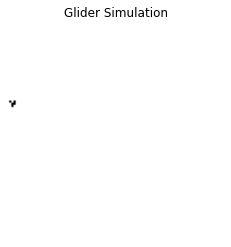

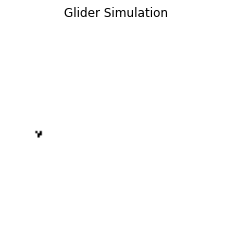

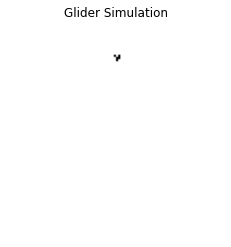

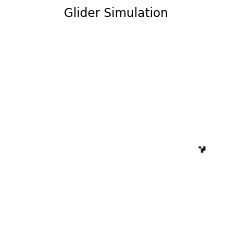

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
np.set_printoptions(threshold=np.inf)

# Define the function that generates a random initial state of the grid
def generate_initial_state():
    grid = np.zeros((100, 100))
    # Choose a random starting position for the glider
    i, j = np.random.randint(0, 97), np.random.randint(0, 97)
    grid[i+1, j+2] = 1
    grid[i+2, j+3] = 1
    grid[i+3, j+1:j+4] = 1
    return grid

board_arrays = []
# Define the function that updates the grid
def update(frame):
    global grid
    new_grid = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            # Count the number of live neighbors
            num_neighbors = (
                grid[(i - 1) % 100, (j - 1) % 100]
                + grid[(i - 1) % 100, j]
                + grid[(i - 1) % 100, (j + 1) % 100]
                + grid[i, (j - 1) % 100]
                + grid[i, (j + 1) % 100]
                + grid[(i + 1) % 100, (j - 1) % 100]
                + grid[(i + 1) % 100, j]
                + grid[(i + 1) % 100, (j + 1) % 100]
            )
            # Update the cell according to the rules of Conway's Game of Life
            if grid[i, j] == 1 and (num_neighbors == 2 or num_neighbors == 3):
                new_grid[i, j] = 1
            elif grid[i, j] == 0 and num_neighbors == 3:
                new_grid[i, j] = 1
    # Update the grid
    grid = new_grid
    # Plot the grid
    board_arrays.append(grid.copy())
    plt.clf()
    plt.imshow(grid, cmap="binary")
    plt.title("Glider Simulation")
    plt.axis("off")


deflates_to_plot=[]

for i in range(50):
  # Generate the initial state of the grid
  grid = generate_initial_state()

  # Create the animation
  ani = FuncAnimation(plt.gcf(), update, frames=100, interval=50)

  # Create a writer object to save the animation as a GIF
  writer = PillowWriter(fps=20)
  ani.save("glider.gif", writer=writer)

  # Show the animation
  plt.show()
  board_list_to_text = board_arrays[0:50]
  # print(len(board_list_to_text))
  import deflate
  import os
  try:
      os.remove("board_arrays.txt")
      # print("Removed Successfully")
  except:
      pass
  with open("board_arrays.txt", "w") as output:
      output.write(str(board_list_to_text.copy()))

  # filedata = open('board_arrays.txt', "rb").readlines()
  # print(filedata)
  filedata = open('board_arrays.txt', 'r', encoding='utf-8').readlines()
  filedata = ''.join(filedata).encode('utf-8')
  # print(filedata)
  compressed = deflate.gzip_compress(filedata, 8)
  deflate_value = compressed.__sizeof__()
  os.system("rm *.txt")
  # print(deflate_value)
  deflates_to_plot.append(deflate_value)

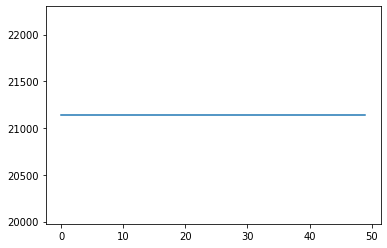

In [3]:
import matplotlib.pyplot as plt
plt.plot(deflates_to_plot)